In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from nn.sdnn import DNN

In [17]:
plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline
plt.style.use('seaborn-bright')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

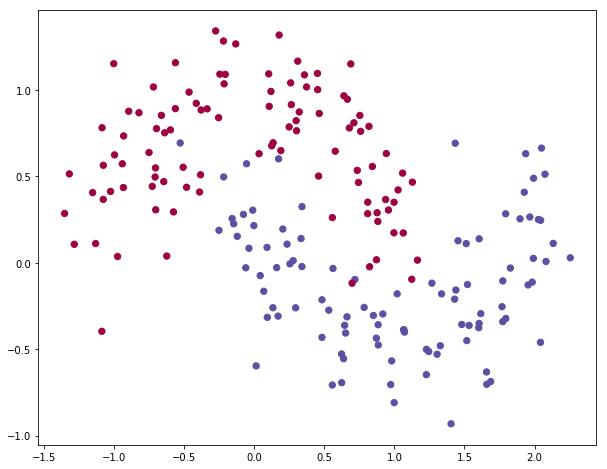

In [18]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [5]:
# Logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [6]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

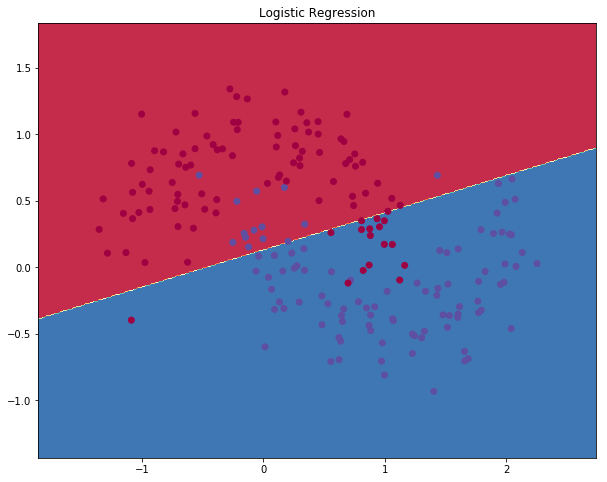

In [7]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [8]:
y[:50]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [9]:
y_one_hot = np.zeros((len(y), 2))

for i in range(len(y)):
    if y[i] == 0:
        y_one_hot[i, 0] = 0
        y_one_hot[i, 1] = 1
    else:
        y_one_hot[i, 0] = 1
        y_one_hot[i, 1] = 0

In [10]:
N = DNN([2, 3, 2])
N.train(X, y_one_hot)

         Current function value: 0.073740
         Iterations: 61
         Function evaluations: 134
         Gradient evaluations: 129


Text(0.5,1,'Decision Boundary for hidden layer size 3')

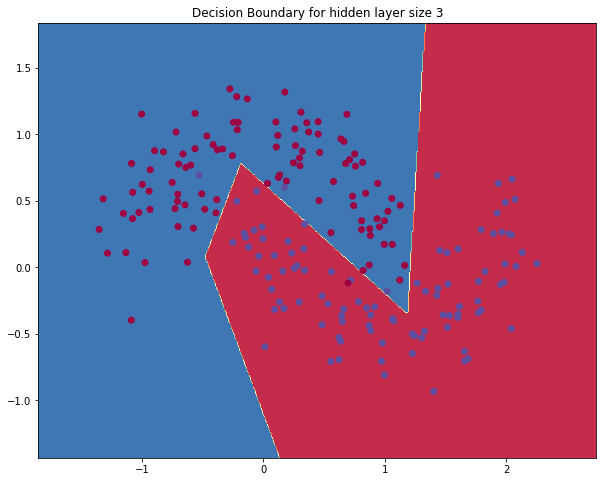

In [11]:
plot_decision_boundary(lambda x: N.predict(x))
plt.title("Decision Boundary for hidden layer size 3")

In [12]:
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
NNs = []

for i in hidden_layer_dimensions:
        NN = DNN([2, i, 2])
        NN.train(X, y_one_hot)
        NNs.append(NN)

Optimization terminated successfully.
         Current function value: 0.299357
         Iterations: 32
         Function evaluations: 44
         Gradient evaluations: 44
         Current function value: 0.279401
         Iterations: 30
         Function evaluations: 85
         Gradient evaluations: 81
         Current function value: 0.073740
         Iterations: 61
         Function evaluations: 134
         Gradient evaluations: 129
         Current function value: 0.267844
         Iterations: 35
         Function evaluations: 138
         Gradient evaluations: 133
         Current function value: 0.261778
         Iterations: 52
         Function evaluations: 112
         Gradient evaluations: 105
         Current function value: 0.014399
         Iterations: 106
         Function evaluations: 217
         Gradient evaluations: 212
         Current function value: 0.030991
         Iterations: 68
         Function evaluations: 127
         Gradient evaluations: 120


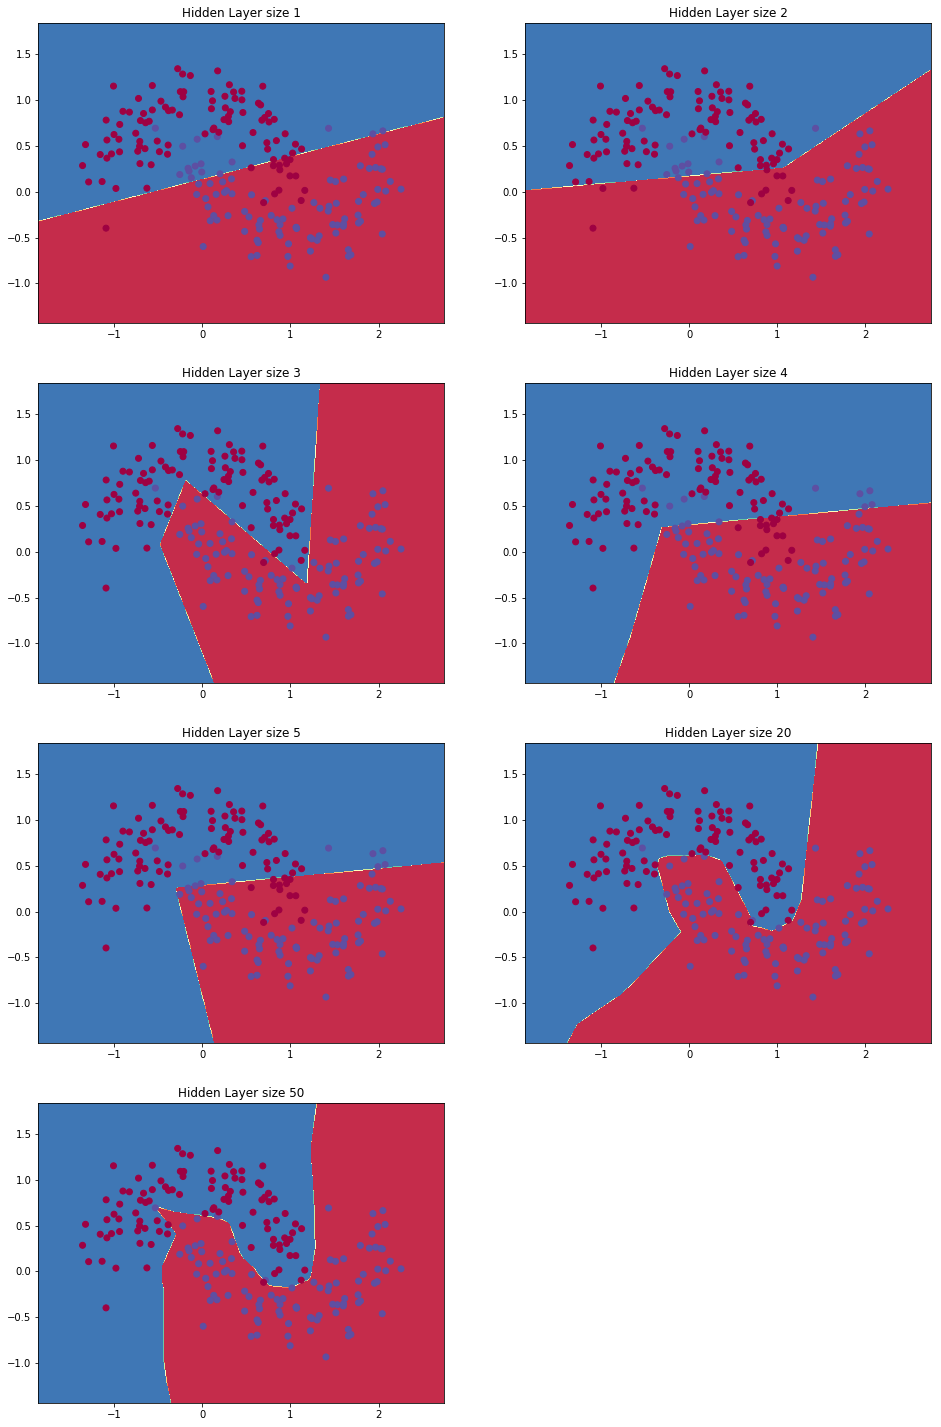

In [13]:
plt.figure(figsize=(16, 32))
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    plot_decision_boundary(lambda x: NNs[i].predict(x))
plt.show()

In [14]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [20]:
NN2 = DNN([2, 6, 4, 2])
NN2.train(X, y_one_hot)

         Current function value: 0.018525
         Iterations: 140
         Function evaluations: 220
         Gradient evaluations: 215


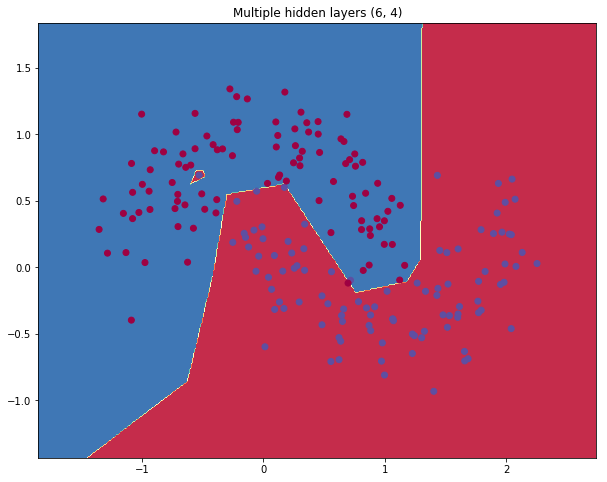

In [23]:
plt.title('Multiple hidden layers (6, 4)')
plot_decision_boundary(lambda x: NN2.predict(x))

In [37]:
NN3 = DNN([2, 60, 20, 2])
NN3.train(X, y_one_hot)

         Current function value: 0.017700
         Iterations: 93
         Function evaluations: 198
         Gradient evaluations: 194


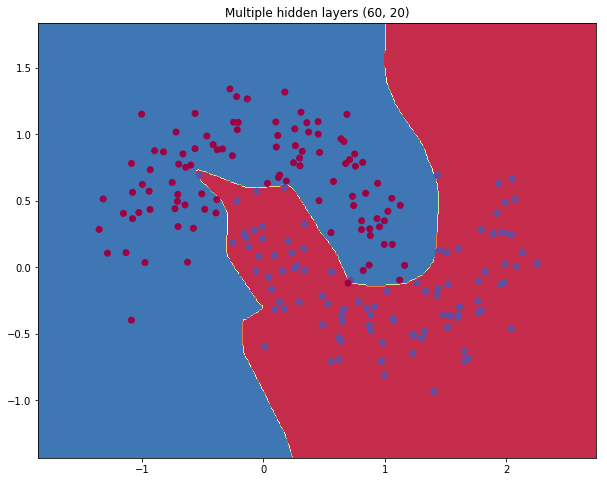

In [39]:
plt.title('Multiple hidden layers (60, 20)')
plot_decision_boundary(lambda x: NN3.predict(x))